# Point vortex solver
### perhaps can be seeded from centroids of real vorticity contours
#### with geographical x,y on which we can overlay a map  

Tangential flow falls off as $C/2 \pi r$ from a point vortex of circulation C, and we only need the velocity at the locations of all the point vortices to evolve the flow: a nice fast compuation. For display, one can reconstruct the flow field everywhere as the sum of all the point vortex-induced flows, for a visualization (streamlines or streamfunction or vectors). Simply must mask out the intense winds in the near-field of the point idealizations. 

In [5]:
# (in the movie, red(blue) dots represent point vortices of positive(negative) circulations, black dots are
# tracer particels (their circulation is zero). Black + symbol represents the common circulation center.
# Feel free to change the code!

#  If you are interested in the topic of point vortex motion, please read through (and cite if appropriate) our 
#  publications:
#
#  Annette Mueller, Peter Nevir, Lisa Schielicke, Mirjam Hirt, Joscha Pueltz & Isabell Sonntag (2015) Applications
#  of point vortex equilibria: blocking events and the stability of the polar vortex, Tellus A: Dynamic Meteorology 
#  and Oceanography, 67:1, DOI: 10.3402/tellusa.v67.29184 
#  https://doi.org/10.3402/tellusa.v67.29184
#
#  Mirjam Hirt, Lisa Schielicke, Annette Mueller & Peter Nevir (2018) Statistics and dynamics of blockings with a 
#  point vortex model, Tellus A: Dynamic Meteorology and Oceanography, 70:1, 1-20, DOI: 10.1080/16000870.2018.1458565
#  https://doi.org/10.1080/16000870.2018.1458565
#
#---------------------------------------------------------------------------------------------------------------------
#  created: 23 Feb 2019 (Lisa Schielicke)
#						

#---------------------------------------------------------------------------------------------------------------------
# Copyright 2019 Lisa Schielicke, contact: lisa.schielicke@met.fu-berlin.de
# Licensed under the Apache License, Version 2.0 (the "License");

In [6]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.integrate import odeint  # Ordinary DEs! 

## Here would go a block to turn a weather scenario into a set of point vortices

In [7]:
##################
######## initial x,y-coordinates and circulations G of an N vortex system ##############################
######################################################################################################################

# Tracer particles have zero circulation:
G=[-1.0*10**6,-0.1*10**6,0.5*10**6,1.3*10**6,-0.8*10**6,4*10**6,2*10**6,0,0,0,0,0]

sizeofpointinplot=[10,1,5,13,8,25,16,2,2,2,2,2] # Please give a representative size, the point vortex 
                                                # should have in the plot. E.g., make the points
                                                # bigger for larger absolute circulations

# Be careful: Do not put two vortices (or tracers) at the same location! This will give errors.
x=[0.,10000,15000,20000,25000,30000,35000,5000,13000,17000,24000,33000] #in m
y=[0.,0,0,0,0,0,0,0,0,0,0,0]                         #in m

# ODE solver parameters, change if necessary
abserr = 1.0e-10    # absolute error measures of the ode solver
relerr = 1.0e-10    # absolute error measures of the ode solver
stoptime = 3600*1*1 # integration time in seconds
numpoints = 300     # defines the time steps of the integration via: 
                    #    t=[stoptime*float(i)/(numpoints-1) for i in range(numpoints)]

plottitle = 'Several point vortex system' #give a nice title for your plots

### pveq updates positions of the vortices

In [25]:
def pveq(w, t, G):
##########################################################################
#  Defines the differential equations for a point vortex system of N points
#
#  Arguments:
#        w :  vector of the x,y-coordinates of each point vortex:
#                  w = [x1,y1,x2,y2]
#        t :  time
#        G :  vector of the N circulations
##########################################################################
  x = w[0::2] #    x : vector of the x-coordinates of the N point vortices
  y = w[1::2] #    y : vector of the y-coordinates of the N point vortices
#
# Create f = (x1',u1',y1',v1',x2',u2',y2',v2',...,xN',uN',yN',vN'):
  f=[]
  for j in range(0,len(G)):
    # calculate the realtive distance between point vortex j and all other point vortices
    disty=y[j]-y 
    distx=x[j]-x
    reldistsq=disty**2+distx**2
    # calculate the new coordinates (point vortex equations for [x- , y-coordinate])
    f.extend([-1/(2*np.pi)*np.sum(G[reldistsq!=0]*disty[reldistsq!=0]/(reldistsq[reldistsq!=0])),
               1/(2*np.pi)*np.sum(G[reldistsq!=0]*distx[reldistsq!=0]/(reldistsq[reldistsq!=0]))])

  return f

### centroid of circulation (it doesn't move) 

In [9]:
#calculate the coordinates of the common center of circulation
Circcenterx=np.sum(np.asarray(G[:])*np.asarray(x[:]))/np.sum(np.asarray(G[:]))
Circcentery=np.sum(np.asarray(G[:])*np.asarray(y[:]))/np.sum(np.asarray(G[:]))


# The solver!

### DO ME: add other influences relevant to weather: flow not due to an interior vortex, and beta effect

1. What flow is not due to vorticity within a limited area? The mean vector averaged over that whole area, I suppose. One could just move the centroid according to that mean flow. 

2. Vortices could change their strength by converting planetary to relative vorticity, beta*y.  

In [10]:
# Create the time samples for the output of the ODE solver.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
w0 = []
for i in range(0,len(G)):
  w0.append(x[i])
  w0.append(y[i])

difft=np.diff(t)[0]

# Call the ODE solver
wsol = odeint(pveq, w0, t, args=(np.asarray(G),difft),atol=abserr, rtol=relerr)

In [12]:
# This could be like one line, right?? BEM 

# (1) find min/max x,y-coordinate range
minx=0
maxx=0
miny=0
maxy=0
for tt in range(0,len(wsol),1):
  for k in range(0,int(len(wsol[0])/2)):
    if wsol[tt][2*k]<minx:
      minx=wsol[tt][2*k]
    if wsol[tt][2*k]>maxx:
      maxx=wsol[tt][2*k]
    if wsol[tt][2*k+1]<miny:
      miny=wsol[tt][2*k+1]
    if wsol[tt][2*k+1]>maxy:
      maxy=wsol[tt][2*k+1]

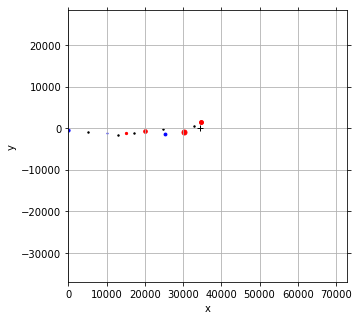

In [29]:
# create a figure and axes
fig = plt.figure(figsize=(5,5))
ax  = plt.subplot()   
ax.clear()
ax.grid()
ax.set_xlim([minx,maxx])
ax.set_ylim([miny,maxy])
ax.plot(Circcenterx,Circcentery,'k+',markersize=6)
ax.set_xlabel('x')
ax.set_ylabel('y')

# for tt in range(0,len(wsol),1):  ## was like 400 frames 
tt = 1
for k in range(0,int(len(wsol[0])/2)):
    if G[k]>0.:
      farbe='r' # plot cyclonic vortices red
    if G[k]<0.:
      farbe='b' # plot anticyclonic vortices blue
    if G[k]==0.:
      farbe='k' # plot streamers black
    ax.scatter(wsol[tt][2*k],wsol[tt][2*k+1],s=[sizeofpointinplot[k]],color=farbe)

# Animate it 

In [14]:
def animate(tt):
  print('tt=',tt)
  ax.clear()
  ax.grid()
  ax.set_xlim([minx,maxx])
  ax.set_ylim([miny,maxy])
  ax.plot(Circcenterx,Circcentery,'k+',markersize=6)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
    # Plot the point vortex motion for each time step
  for k in range(0,np.int(len(wsol[0])/2)):
    if G[k]>0.:
      farbe='r' # plot cyclonic vortices red
    if G[k]<0.:
      farbe='b' # plot anticyclonic vortices blue
    if G[k]==0.:
      farbe='k' # plot streamers black
    ax.scatter(wsol[tt][2*k],wsol[tt][2*k+1],s=[sizeofpointinplot[k]],color=farbe)
#
  ax.set_title('%s\ncirculation center = (%.2f,%.2f),t=%.2f s' %(plottitle,Circcenterx,Circcentery,t[tt]))
#  plt.savefig('%s%s_%06d.png' %(figfolder,figprefix,tt))
#  plt.close(fig)



In [17]:
anim = animation.FuncAnimation(fig, animate,48,interval=1000, blit=False)

anim

In [19]:
fig.show()

<ipython-input-19-6ebedab27258>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
